In [1]:
import warnings; 
warnings.simplefilter('ignore')

In [2]:
!pip install pystan
!pip install prophet
!pip install scikit-learn

  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached aiohttp-3.8.4-cp310-cp310-win_amd64.whl (319 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.whl (12 kB)
  Using cached pystan-3.0.0-py3-none-any.whl (12 kB)
  Using ca

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [17 lines of output]
  Traceback (most recent call last):
    File "C:\Users\abbu0\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\abbu0\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
    File "C:\Users\abbu0\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
      return hook(config_settings)
    File "C:\Users\abbu0\AppData\Local\Temp\pip-build-env-jdgk53le\overlay\Lib\site-packages\setuptools\build_meta.py", line 341, in get_requires_for_build_wheel
      return self._get_build_requires(config_

In [3]:
import numpy as np
import pandas as pd

from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [4]:
df = pd.read_csv('datasets/stock-market/NIFTY 50_Data.csv')

In [5]:
df.head(5)

,Date,Open,High,Low,Close
0,09 Sep 2022,17923.35,17925.95,17786.00,17833.35
1,08 Sep 2022,17748.15,17807.65,17691.95,17798.75
2,07 Sep 2022,17519.40,17650.75,17484.30,17624.40
3,06 Sep 2022,17695.70,17764.65,17587.65,17655.60
4,05 Sep 2022,17546.45,17683.15,17540.35,17665.80


In [6]:
df['ds'] = pd.to_datetime(df['Date'])

In [7]:
df.head(5)

,Date,Open,High,Low,Close,ds
0,09 Sep 2022,17923.35,17925.95,17786.00,17833.35,2022-09-09
1,08 Sep 2022,17748.15,17807.65,17691.95,17798.75,2022-09-08
2,07 Sep 2022,17519.40,17650.75,17484.30,17624.40,2022-09-07
3,06 Sep 2022,17695.70,17764.65,17587.65,17655.60,2022-09-06
4,05 Sep 2022,17546.45,17683.15,17540.35,17665.80,2022-09-05


In [8]:
df['y'] = df['Close']

In [9]:
df.head(5)

,Date,Open,High,Low,Close,ds,y
0,09 Sep 2022,17923.35,17925.95,17786.00,17833.35,2022-09-09,17833.35
1,08 Sep 2022,17748.15,17807.65,17691.95,17798.75,2022-09-08,17798.75
2,07 Sep 2022,17519.40,17650.75,17484.30,17624.40,2022-09-07,17624.40
3,06 Sep 2022,17695.70,17764.65,17587.65,17655.60,2022-09-06,17655.60
4,05 Sep 2022,17546.45,17683.15,17540.35,17665.80,2022-09-05,17665.80


In [10]:
df.drop(['Date', 'Open', 'High', 'Low', 'y'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [11]:
df.head(100)

,y,ds
0,17833.35,2022-09-09
1,17798.75,2022-09-08
2,17624.40,2022-09-07
3,17655.60,2022-09-06
4,17665.80,2022-09-05
...,...,...
95,16953.95,2022-04-25
96,17171.95,2022-04-22
97,17392.60,2022-04-21
98,17136.55,2022-04-20


In [12]:
from sklearn.model_selection import train_test_split

<Axes: xlabel='ds'>

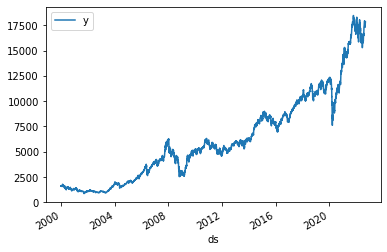

In [13]:
df.plot(x='ds',y='y')

In [14]:
len(df)

5645

In [15]:
demo_set = df[:1000]

<Axes: xlabel='ds'>

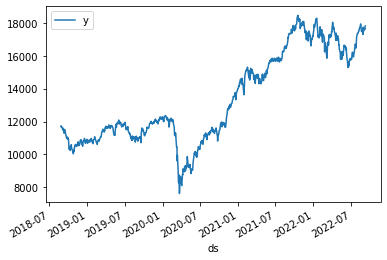

In [16]:
demo_set.plot(x='ds',y='y')

In [17]:
train = demo_set[200:]
test = demo_set[:200]

In [18]:
test.head()

,y,ds
0,17833.35,2022-09-09
1,17798.75,2022-09-08
2,17624.40,2022-09-07
3,17655.60,2022-09-06
4,17665.80,2022-09-05


<Axes: xlabel='ds'>

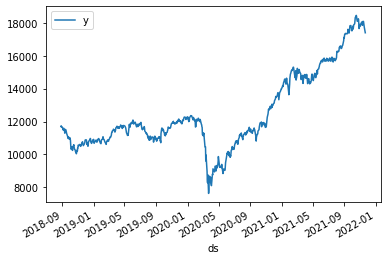

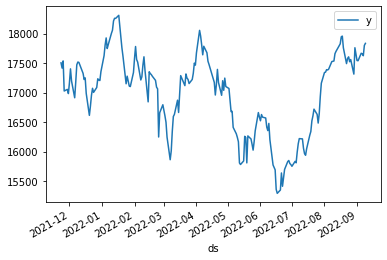

In [19]:
train.plot(x='ds',y='y')
test.plot(x='ds',y='y')

In [20]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(train)

12:18:53 - cmdstanpy - INFO - Chain [1] start processing
12:18:53 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
future = m.make_future_dataframe(periods=200,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-08-27,11604.160189,10726.507316,11935.768342,11604.160189,11604.160189,-270.040815,-270.040815,-270.040815,59.802007,...,-49.864750,-49.864750,-49.864750,-279.978073,-279.978073,-279.978073,0.0,0.0,0.0,11334.119373
1,2018-08-28,11589.881958,10708.815925,11985.224317,11589.881958,11589.881958,-229.338572,-229.338572,-229.338572,59.802007,...,-20.629450,-20.629450,-20.629450,-268.511129,-268.511129,-268.511129,0.0,0.0,0.0,11360.543387
2,2018-08-29,11575.603728,10766.324260,11971.877021,11575.603728,11575.603728,-214.170900,-214.170900,-214.170900,59.802007,...,-15.988438,-15.988438,-15.988438,-257.984469,-257.984469,-257.984469,0.0,0.0,0.0,11361.432829
3,2018-08-30,11561.325498,10783.196563,11947.951397,11561.325498,11561.325498,-213.088513,-213.088513,-213.088513,59.802007,...,-24.441349,-24.441349,-24.441349,-248.449171,-248.449171,-248.449171,0.0,0.0,0.0,11348.236985
4,2018-08-31,11547.047268,10728.037685,11938.607968,11547.047268,11547.047268,-210.260926,-210.260926,-210.260926,59.802007,...,-30.120512,-30.120512,-30.120512,-239.942420,-239.942420,-239.942420,0.0,0.0,0.0,11336.786342


<Axes: xlabel='ds'>

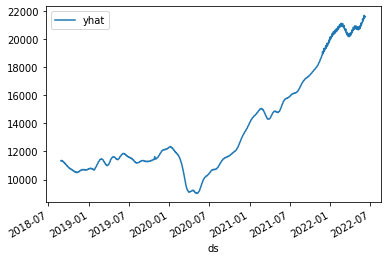

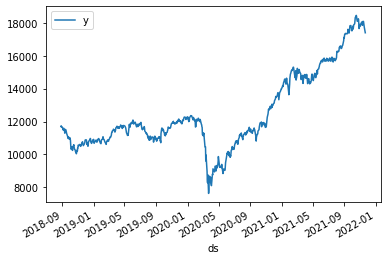

In [22]:
forecast.plot(x='ds',y='yhat')
train.plot(x='ds',y='y')

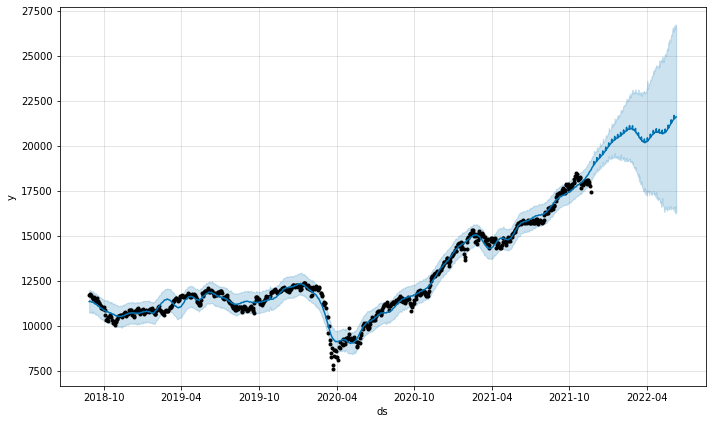

In [23]:
plot1 = m.plot(forecast)

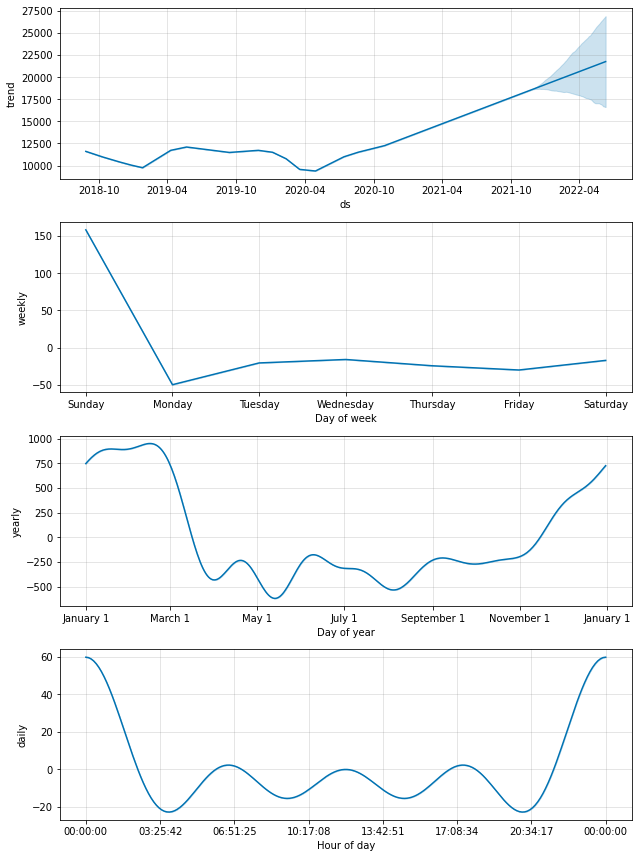

In [24]:
plot2 = m.plot_components(forecast)

In [25]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
995,2022-06-06,21687.178038,16330.775107,26458.279701,16670.017346,26691.277889,-181.721771,-181.721771,-181.721771,59.802007,...,-49.864750,-49.864750,-49.864750,-191.659028,-191.659028,-191.659028,0.0,0.0,0.0,21505.456267
996,2022-06-07,21703.326152,16274.860492,26693.840953,16655.954289,26740.583591,-145.228240,-145.228240,-145.228240,59.802007,...,-20.629450,-20.629450,-20.629450,-184.400797,-184.400797,-184.400797,0.0,0.0,0.0,21558.097912
997,2022-06-08,21719.474267,16635.758025,26702.525701,16641.891232,26789.889294,-135.779960,-135.779960,-135.779960,59.802007,...,-15.988438,-15.988438,-15.988438,-179.593529,-179.593529,-179.593529,0.0,0.0,0.0,21583.694307
998,2022-06-09,21735.622382,16234.856791,26750.962856,16627.828175,26839.194997,-141.790019,-141.790019,-141.790019,59.802007,...,-24.441349,-24.441349,-24.441349,-177.150677,-177.150677,-177.150677,0.0,0.0,0.0,21593.832363
999,2022-06-10,21751.770496,16325.458406,26585.846402,16613.765118,26888.500700,-147.263028,-147.263028,-147.263028,59.802007,...,-30.120512,-30.120512,-30.120512,-176.944523,-176.944523,-176.944523,0.0,0.0,0.0,21604.507469


<Axes: xlabel='ds'>

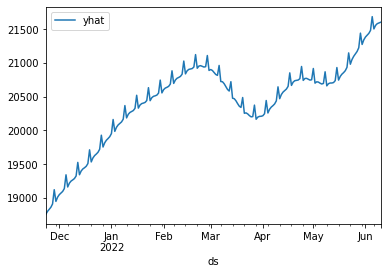

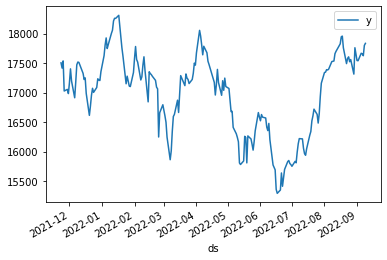

In [26]:
validate_forecast = forecast[800:]
validate_forecast.plot(x='ds',y='yhat')
test.plot(x='ds',y='y')

In [27]:
def predict_future_value(x):
    future = m.make_future_dataframe(periods=x,freq='D')
    forecast = m.predict(future)
    return forecast.tail(1)

In [28]:
predict_future_value(200)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
999,2022-06-10,21751.770496,16255.340838,26199.241846,16628.506676,26563.079979,-147.263028,-147.263028,-147.263028,59.802007,...,-30.120512,-30.120512,-30.120512,-176.944523,-176.944523,-176.944523,0.0,0.0,0.0,21604.507469


In [29]:
len(train)

800